In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action= 'ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("market.csv",sep = ";")

In [3]:
df.head(10)

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,07.01.2017 00:00,1.0,2.00,2.00,Kocaeli,467369.0,Sercan KIZILOK,İÇECEK,E
1,10537.0,8.0,TOZ SEKER,18105,06.01.2017 00:00,5.0,2.65,13.25,Antalya,131464.0,İsmet ŞINGIR,İÇECEK,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,03.01.2017 00:00,1.0,0.40,0.40,İstanbul,656969.0,Yağız KUBAL,GIDA,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,03.01.2017 00:00,1.0,0.40,0.40,İstanbul,656969.0,Yağız KUBAL,GIDA,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,05.01.2017 00:00,1.0,0.40,0.40,İzmir,447336.0,Habibe AYSAN,GIDA,K
5,10649.0,8.0,TOZ SEKER,18127,06.01.2017 00:00,2.0,2.65,5.30,Elazığ,9485.0,Görkem BALTAOGLU,İÇECEK,E
6,11845.0,3202.0,F NEFFIS TOZ SEKER 2 KG,18476,07.01.2017 00:00,1.0,5.60,5.60,Malatya,5481.0,Asel LÜLECİOĞLU,İÇECEK,K
7,11348.0,8.0,TOZ SEKER,18354,03.01.2017 00:00,2.0,2.65,5.30,İstanbul,144939.0,Efe HANÇAR,İÇECEK,E
8,10545.0,8.0,TOZ SEKER,18106,06.01.2017 00:00,2.0,2.65,5.30,Manisa,7874.0,Melisa GÜÇİN,İÇECEK,K
9,11411.0,3205.0,F NEFFIS KESME SEKER 1 KG,18365,03.01.2017 00:00,1.0,2.85,2.85,Muğla,784782.0,Şükran COMART,İÇECEK,K


In [4]:
df.isnull().sum()

ID                  1
ITEMCODE          193
ITEMNAME          193
FICHENO             0
DATE_               1
AMOUNT              1
PRICE               1
LINENETTOTAL        1
CITY                1
CLIENTCODE        491
CLIENTNAME        491
CATEGORY_NAME1    193
GENDER            491
dtype: int64

In [5]:
df.fillna(0,inplace = True)

## Burada boş değerlere 0 verip doldurmak için yol aradım bulamadım:(

In [6]:
df[(df['ITEMCODE']==0) & (df['ITEMNAME']!=0)]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER


In [7]:
df[(df['CLIENTCODE']!=0) & (df['CLIENTNAME']==0)]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER


In [8]:
df[(df['CATEGORY_NAME1']!=0) & (df['ITEMNAME']==0)]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER


In [9]:
df = pd.read_csv("market.csv",sep = ";")

In [10]:
df.dropna(axis = 0,inplace = True)

In [11]:
df = df.drop("ID",axis=1)

In [12]:
c = df.groupby(['CLIENTNAME', "FICHENO"]).size().sort_values(ascending = False).reset_index()

In [13]:
c.head(10)

,CLIENTNAME,FICHENO,0
0,Mira BAYRİ,16413,77
1,Tansu SUNAN,17659,59
2,Gizem KANAR,16721,59
3,Azra KUNDAKSIZ,16723,54
4,Hazal ÖZBAKIŞ,17450,51
5,Birol BORAZAN,17548,49
6,Miray CALIK,16732,46
7,Yalçın TEMİZ,16626,46
8,Mahmut TAŞHAN,19679,42
9,Sema DUYU,16745,40


In [14]:
ürün_adet = df.groupby(['ITEMNAME', "AMOUNT"]).size().sort_values(ascending = False).reset_index()

In [15]:
ürün_adet.head(10)

,ITEMNAME,AMOUNT,0
0,SİHİRLİ ELLER CİG KÖFTE 200GR,1.0,419
1,EKMEK 250 GR,1.0,152
2,EKMEK 250 GR,2.0,149
3,TOZ SEKER,2.0,120
4,F NEFFIS SÜT YARIM YAĞLI 1 LT,1.0,112
5,PINAR SUT 1 LT.,1.0,79
6,SİHİRLİ ELLER CİG KÖFTE 200GR,2.0,77
7,BILLUR TUZ 750 GR.,1.0,73
8,EKMEK 250 GR,3.0,69
9,COCA COLA 2.5 LT. EKO BOY,1.0,68


In [16]:
yeni_df = pd.DataFrame(ürün_adet["AMOUNT"].sort_values(ascending=False))

In [17]:
yeni_df.head(10)

,AMOUNT
2500,140.0
3291,80.0
3474,50.0
2800,50.0
3336,50.0
951,48.0
2040,48.0
6084,40.0
2389,40.0
3192,33.0


In [18]:
df[df["AMOUNT"]==140]

,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER
16773,18253.0,PASAKOY AYRAN 200GR,57114,30.01.2017 00:00,140.0,0.35,49.0,İstanbul,957558.0,Fevzi BİDECİ,İÇECEK,E


In [19]:
df["CLIENTCODE"].nunique()

6064

In [20]:
df["CLIENTNAME"].nunique()

6054

## burada uniq name ve code birbiriyle uyuşmadığı için şüphelendim ve uğraşmaya başladım

In [21]:
uniqname = df["CLIENTNAME"].unique()
clientcode = []
yanliscode = []
for i in uniqname:
    a = df[df["CLIENTNAME"]==i]
    clientcode.append(a["CLIENTCODE"].unique())
np.set_printoptions(threshold=np.inf)
for i in clientcode:
    deger = len((i))
    if deger>1:
        yanliscode.append(i)
    else:
        continue


In [22]:
yanliscode
    

[array([ 327636.,  158724.,  735160.,  144421.,  113262.,  874241.,
        1089194., 1064487.,  341438.,  745355.,  155744.,  575530.,
         593176.,   80645.,  949111.,  846043.,   93451.,  563460.,
        1032068.,  713296.]),
 array([ 837019., 1055409.]),
 array([731527., 442626.]),
 array([ 158786., 1075829.]),
 array([298069., 615922.]),
 array([  928., 45704.]),
 array([350307., 743511.])]

In [23]:
newyanliscode=[]
for a in range(len(yanliscode)):
    for i in yanliscode[a]:
        newyanliscode.append(i)


In [24]:
newyanliscode

[327636.0,
 158724.0,
 735160.0,
 144421.0,
 113262.0,
 874241.0,
 1089194.0,
 1064487.0,
 341438.0,
 745355.0,
 155744.0,
 575530.0,
 593176.0,
 80645.0,
 949111.0,
 846043.0,
 93451.0,
 563460.0,
 1032068.0,
 713296.0,
 837019.0,
 1055409.0,
 731527.0,
 442626.0,
 158786.0,
 1075829.0,
 298069.0,
 615922.0,
 928.0,
 45704.0,
 350307.0,
 743511.0]

In [25]:
lastuniqname=[]
tumsiparis = []
for i in newyanliscode:
    tumsiparis.append(df[df["CLIENTCODE"]==i])
for a in range(len(tumsiparis)):
    lastuniqname.append(tumsiparis[a]["CLIENTNAME"].unique())


###### ve sonuç olarak aynı isim olum client code vermiş ilk etapta bu olabilir ama aynı kişiler şehirleri aynı siparişleri aynı ama farklı bir client code verilmiş, aynı şekilde aynı client code verilip farklı isimler de var veri setinde bunu daha iyi anlaşılması için aşağıdaki sorguda görülmektedir.

In [26]:
pd.DataFrame(lastuniqname,columns = ["aynı_isim_farklı_code","aynı_code_farklı_isim"])

,aynı_isim_farklı_code,aynı_code_farklı_isim
0,Hatice TEKİNSİZ,Hatice YAPALI
1,Hatice TEKİNSİZ,None
2,Hatice TEKİNSİZ,None
3,Hatice TEKİNSİZ,None
4,Hatice TEKİNSİZ,None
5,Hatice TEKİNSİZ,None
6,Hatice TEKİNSİZ,Hatice kübra KARAÇUBAN
7,Hatice TEKİNSİZ,Hatice kübra KARATATAR
8,Hatice TEKİNSİZ,Hatice kübra DADAŞ
9,Hatice TEKİNSİZ,None


In [27]:
df[df["CLIENTNAME"]=="Hatice kübra DADAŞ"]

,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER
14234,5733.0,TURP,16941,05.01.2017 00:00,0.17,2.4,0.41,Aydın,341438.0,Hatice kübra DADAŞ,MEYVE SEBZE,K


##### görüldüğü üzere hatice kübra dadaş ismini de aynı client code verilmiş bu bilerek mi böyle yapılmış yoksa yanlışlıklamı yapıldı bilmiyorum.

In [28]:
df[df["CLIENTCODE"]==341438.0]

,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,CITY,CLIENTCODE,CLIENTNAME,CATEGORY_NAME1,GENDER
4039,263.0,YAHYAOGLU 15 LI YUMURTA,16941,05.01.2017 00:00,1.000,4.85,4.85,Aydın,341438.0,Hatice TEKİNSİZ,SÜT KAHVALTILIK,K
10431,9789.0,DR.OETKER SUPANGLE 155 GR.,16941,05.01.2017 00:00,1.000,1.85,1.85,Aydın,341438.0,Hatice TEKİNSİZ,GIDA,K
10432,9789.0,DR.OETKER SUPANGLE 155 GR.,16941,05.01.2017 00:00,1.000,1.85,1.85,Aydın,341438.0,Hatice TEKİNSİZ,GIDA,K
10468,5746.0,KEREVIZ,16941,05.01.2017 00:00,0.330,2.75,0.91,Aydın,341438.0,Hatice TEKİNSİZ,MEYVE SEBZE,K
13006,5719.0,MOR LAHANA,16941,05.01.2017 00:00,0.535,1.69,0.90,Aydın,341438.0,Hatice TEKİNSİZ,MEYVE SEBZE,K
14234,5733.0,TURP,16941,05.01.2017 00:00,0.170,2.40,0.41,Aydın,341438.0,Hatice kübra DADAŞ,MEYVE SEBZE,K


In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
df["PRICE"].sort_values(ascending = False)

10179    64.95
14719    64.95
5803     59.45
12313    49.75
3017     46.95
         ...  
1811      0.01
1059      0.01
1060      0.01
1061      0.01
928       0.01
Name: PRICE, Length: 18130, dtype: float64

In [31]:
df.iloc[10179]

ITEMCODE                        9099.0
ITEMNAME          ANTRIKOT PASTIRMA KG
FICHENO                          19965
DATE_                 07.01.2017 00:00
AMOUNT                           0.108
PRICE                            64.95
LINENETTOTAL                      7.01
CITY                            Ankara
CLIENTCODE                   1056201.0
CLIENTNAME             Fahrettin VERİM
CATEGORY_NAME1                ET TAVUK
GENDER                               E
Name: 10179, dtype: object

In [51]:
kisi_bazli_satis = df.groupby(["CLIENTNAME","CITY"]).size().sort_values(ascending = False).reset_index()

In [53]:
kisi_bazli_satis

,CLIENTNAME,CITY,0
0,Mira BAYRİ,Antalya,77
1,Tansu SUNAN,Uşak,59
2,Gizem KANAR,İzmir,59
3,Azra KUNDAKSIZ,Muğla,54
4,Hazal ÖZBAKIŞ,Samsun,51
...,...,...,...
6391,Kamile ATLIKULAÇ,Diyarbakır,1
6392,Kamile AĞIRTAŞ,Siirt,1
6393,Kamile HACIBEKİROĞLU,Antalya,1
6394,Kamile KARADEMIR,İzmir,1


In [54]:
il_baz_ürün = df.groupby(["ITEMNAME","CITY"]).size().sort_values(ascending = False).reset_index()

In [55]:
il_baz_ürün

,ITEMNAME,CITY,0
0,SİHİRLİ ELLER CİG KÖFTE 200GR,İstanbul,101
1,EKMEK 250 GR,İstanbul,83
2,OSMANCIK PIRINC KG.,İstanbul,53
3,SİHİRLİ ELLER CİG KÖFTE 200GR,İzmir,43
4,TOZ SEKER,İstanbul,37
...,...,...,...
12342,FIDANLAR KEKIK 100 GR,Aydın,1
12343,FIDANLAR KEKIK 100 GR,Bursa,1
12344,FIDANLAR KEKIK 100 GR,Kahramanmaraş,1
12345,FIDANLAR KEKIK 100 GR,Kayseri,1


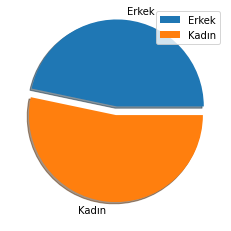

In [74]:
mylabels = ["Erkek","Kadın"]
myexplode = [0.1,0,]
plt.pie(df.groupby(["GENDER"]).size(),labels = mylabels, explode = myexplode, shadow = True)
plt.legend()